# A Basic Model of Electricity and Heat Systems

Consider a stylized model of the electricity and heat systems where a portfolio of generators (indexed $i$) competes to serve a time varying demand for electricity $(D_h^E)$ and heat $(D_h^H)$, where $h$ refers to hours. The consumers' willingness to pay are 100 €/MWh for both electricity and heat throughout all hours. The system relies on four different type of generators:

- <u>Standard (dispatchable) plants</u> use a combination of primary energy carriers (indexed by $j$) and an aggregate of other inputs $(oth)$ to produce either electricity or heat. Let $\mu_j^i$ denote the input share of energy carrier $j$ for generator $i$, measured as MWh input of energy carrier $j$ per MWh output of electricity or heat. Let $E_{i,h}$ and $H_{i,h}$ denote the hourly generation of electricity and heat, and let $q_i$ denote the installed hourly generating capacity for the plant $i$.
- <u>Intermittent plants</u> are similar to standard plants, except that hourly generating capacity is defined as $q_{i,h} = q_i \gamma_{i,h}$ where $\gamma_{i,h}\in[0,1]$ indicates availability of generator $i$ in hour $h$. We use the notation $\mathcal{I}^E$ ($\mathcal{I}^H$) to denote the set of all standard and intermittent electricity (heat) producing plants.    
- <u>Back-pressure plants</u> are similar to standard electricity producing plants, except that they utilize the excess heat from electricity production to co-produce heat. Let $\nu_i$ denote the electricity-to-heat ratio for a back-pressure plant $i$. We use the notation $\mathcal{I}^{BP}$ to denote the set of all back-pressure plants. 
- <u>Heat pumps</u> are slightly different than standard heat producing plants as they rely on electricity as energy input. Thus, heat pumps have negative electricity-to-heat ratios $(\nu_i<0)$. We use the notation $\mathcal{I}^{HP}$ to denote the set of all heat pumps.

The optimization problem is given by the system in (1):

\begin{align}
    \max_{E_{i,h}, H_{i,h}, D_h^E, D_h^H} &W = \sum_h\left( u_E\cdot D_h^E-\sum_{i \in \lbrace \mathcal{I}^E, \mathcal{I}^{BP}\rbrace}c_i\cdot E_{i,h}\right)-\sum_{i\in\lbrace \mathcal{I}^E,\mathcal{I}^{BP}\rbrace}\text{FOM}_i\cdot q_i^E \tag{1a} \label{eq:mBasicHeat_Objective}\\ 
    &+{\sum_h\left( u_H\cdot D_h^H-\sum_{i \in \lbrace \mathcal{I}^H, \mathcal{I}^{HP}\rbrace}c_i\cdot H_{i,h}\right)-\sum_{i\in\lbrace \mathcal{I}^H, \mathcal{I}^{HP}\rbrace}\text{FOM}_i\cdot q_i^H} \notag \\
    &E_{i,h}= \nu_i H_{i,h}, \qquad \forall i\in\lbrace \mathcal{I}^{BP}, \mathcal{I}^{HP} \rbrace\label{eq:mBasicHeat_CHP} \tag{1b} \\
    &D_h^E = \sum_{i\in \lbrace \mathcal{I}^E, \mathcal{I}^{BP}, \mathcal{I}^{HP}\rbrace }E_{i,h} \label{eq:mBasicHeat_equi_E} \tag{1c}\\ 
    &D_h^H = \sum_{i\in \lbrace \mathcal{I}^H, \mathcal{I}^{BP}, \mathcal{I}^{HP}\rbrace} H_{i,h} \label{eq:mBasicHeat_equi_H} \tag{1d}\\ 
    &D_h^E\in[0, L_h^E] \label{eq:mBasicHeat_LoadConstraintE} \tag{1e}\\ 
    &D_h^H\in[0,L_h^H] \label{eq:mBasicHeat_LoadConstraintH} \tag{1f}\\ 
    &E_{i,h} \in[0,q_{i,h}^E], \qquad \forall i\in\lbrace \mathcal{I}^E,\mathcal{I}^{BP}\rbrace. \label{eq:mBasicHeat_ECap} \tag{1g}\\
    &H_{i,h} \in[0,q_{i,h}^H], \qquad \forall i\in\lbrace \mathcal{I}^H, \mathcal{I}^{HP}\rbrace \label{eq:mBasicHeat_HCap} \tag{1h}
\end{align}

# Part 1: Analytical exercises

## E1.1

__Describe the optimization problem above.__

---
___Answer:___

The optimization problem is identical to the problem in (23) in Berg (2023). 
- (1a) is the welfare function, which is the sum of consumer and producer surplus subtracted by total fixed operating other maintanence costs on both electricity and heat markets. 
    - Note that since $q_i$ is fixed, the fixed costs do not impact the optimal solution to the linear programming (LP) problem in (1).
- (1b) is the co-generation constraint of back-pressure plants $(\nu_{\lbrace i\in\mathcal{I^{BP}}\rbrace}>0)$ as well as the inverse electrical efficiency of heat pumps $(\nu_{\lbrace i\in\mathcal{I^{HP}}\rbrace}<0)$.
- (1c) is the equilibrium identity on the electricity market. Here, the "generation" from heat pumps is negative because they use electricity when generating heat.
- (1d) is the equilibrium identity on the heating market.
- (1e) and (1f) are domain constraints on demand. It essentially allows the optimal solution to entail demand curtailment. 
- Finally, (1g) and (1h) are domain constraints on generation, limiting maximum generation to be within capacity bounds. 

## E1.2

__Set up the Lagrangian for the optimization problem in [E1.1](#E1.1) and show that the first order conditions for $E_{i,h}$ and $H_{i,h}$ can be writen as:__

\begin{align}
\forall i\in\mathcal{I}^E & : & - c_i+\lambda_h^E + \underline{\theta}_{i,h}^E-\overline{\theta}_{i,h}^E &= 0 \\
\forall i\in\mathcal{I}^{BP} & : & - c_i+\lambda_h^E + \frac{\lambda^H}{\nu_i} +\underline{\theta}_{i,h}^E-\overline{\theta}_{i,h}^E &= 0 \\
\forall i\in\mathcal{I}^{H} & : & - c_i+\lambda_h^H + \underline{\theta}_{i,h}^H-\overline{\theta}_{i,h}^H &= 0  \\
\forall i\in\mathcal{I}^{HP} & : & - c_i+\lambda_h^H + \nu_i\lambda^E +\underline{\theta}_{i,h}^H-\overline{\theta}_{i,h}^H &= 0
\end{align}

where $\lambda^E$ and $\lambda^H$ denote the shadow costs of equilibrium constraints on electricity and heat markets in hour $h$, respectively, and $\underline{\theta}$ and $\overline{\theta}$ denote the shadow costs on the domain constraints on generation variables $E$ and $H$. 

*Note: Use the same notation as in the above*.

---
___Answer:___

Following the notation in section 4.2 of Berg (2023), where $\Lambda$ indicates the terms from equality constraints and $\Theta$ indicates the terms from bounds on variables. The Lagrangian of the problem is then given by:

\begin{align}
    \mathcal{L} =& W + \sum_h\left( \Lambda_h^E + \Lambda_h^H + \sum_{i\in \lbrace \mathcal{I}^{BP}, \mathcal{I}^{HP}\rbrace }\Lambda_{h,i}^{CHP}\right) \\ 
    &\sum_h\left(\Theta_h^{DH}+\Theta_h^{DE}+\sum_{i\in \lbrace \mathcal{I}^{E}, \mathcal{I}^{BP}\rbrace}\Theta_{h,i}^E+\sum_{i\in \lbrace \mathcal{I}^{H}, \mathcal{I}^{HP}\rbrace}\Theta_{h,i}^H\right) \notag \\
    \Lambda_h^E =& \lambda_h^E\left(\sum_{i\in \lbrace \mathcal{I}^E, \mathcal{I}^{BP}, \mathcal{I}^{HP}\rbrace } E_{i,h}-D_h^E\right) \notag \\
    \Lambda_h^H =& \lambda_h^H\left(\sum_{i\in \lbrace \mathcal{I}^H, \mathcal{I}^{BP},\mathcal{I}^{HP}\rbrace} H_{i,h} - D_h^H\right) \notag \\
    \Lambda_{h,i}^{CHP} =& \lambda_{i,h}^{CHP}\left(E_{i,h}-\nu_i H_{i,h}\right) \notag \\
    \Theta_h^{DE} =& \underline{\theta}^{DE}_hD_h^E+\overline{\theta}^{DE}_h(L_h^E-D_h^E) \notag \\
    \Theta_h^{DH} =& \underline{\theta}^{DH}_hD_h^H+\overline{\theta}^{DH}_h(L_h^H-D_h^H) \notag \\
    \Theta_{h,i}^E =& \underline{\theta}^E_{i,h}E_{i,h}+\overline{\theta}^E_{i,h}\left(q_{i,h}-E_{i,h}\right) \notag \\
    \Theta_{h,i}^H =& \underline{\theta}^H_{i,h}H_{i,h}+\overline{\theta}^H_{i,h}\left(q_{i,h}-H_{i,h}\right) \notag
\end{align}

Once again, the size of this expression is becoming a bit intimidating, but, it consists almost entirely of repetitions of what we have already seen. 

The necessary first-order conditions are given by:

\begin{align}
    \text{For }i\in\mathcal{I}^E: && \dfrac{\partial \mathcal{L}}{\partial E_{i,h}} = 0: && -c_i +\lambda_h^E +\underline{\theta}_{i,h}^E-\overline{\theta}_{i,h}^E =&0 \\ 
    \text{For }i\in\mathcal{I}^{BP}: && \dfrac{\partial \mathcal{L}}{\partial E_{i,h}} = 0: && -c_i+\lambda_h^E + \lambda_{i,h}^{CHP}+\underline{\theta}_{i,h}^E-\overline{\theta}_{i,h}^E =& 0 \\
    \text{For }i\in\mathcal{I}^{HP}: && \dfrac{\partial \mathcal{L}}{\partial E_{i,h}} =0: && \lambda_h^E+\lambda_{i,h}^{CHP} =& 0 \\
    \text{For }i\in\mathcal{I}^H: && \dfrac{\partial \mathcal{L}}{\partial H_{i,h}} = 0: && -c_i +\lambda_h^H +\underline{\theta}_{i,h}^H-\overline{\theta}_{i,h}^H =&0 \\ 
    \text{For }i\in\mathcal{I}^{BP}: && \dfrac{\partial \mathcal{L}}{\partial H_{i,h}} = 0: && \lambda_h^H-\nu_i\lambda_{i,h}^{CHP} =& 0 \\
    \text{For }i\in\mathcal{I}^{HP}: && \dfrac{\partial \mathcal{L}}{\partial H_{i,h}} =0: && -c_i+\lambda_h^H-\nu_i\cdot \lambda_{i,h}^{CHP} +\underline{\theta}_{i,h}^H-\overline{\theta}_{i,h}^H=& 0.
\end{align}
Inserting $\eqref{eq:mBasicHeat_FOC_H_BP}$ into $\eqref{eq:mBasicHeat_FOC_E_BP}$ yields equation (2b), and inserting $\eqref{eq:mBasicHeat_FOC_E_HP}$ into $\eqref{eq:mBasicHeat_FOC_H_HP}$ yields equation (2d).


## E1.3

__Briefly explain the intuition the first-order conditions in [E1.2](#E1.2).__ 

---
___Answer:___

To interpret the necessary first-order conditions, we first recognize that $\lambda_h^E$ and $\lambda_h^H$ as equilibrium prices in the electricity market and the heat market, respectively. We then see:

- Eq. (2a) is the conventional first-order condition for standard electricity plants: When $\lambda_h^E-c_i>0$, the plant is relatively cost-effective. In this case, $\overline{\theta}_{i,h}^E=\lambda_h^E-c_i>0$ indicating that the relevant upper domain constraint is active $(E_{i,h}=q_{i,h})$. 
- An equivalent interpretation for standard heat producing electricity producing plants in (2c) holds.
- For back-pressure plants, the condition in (2b) is the same as for standard plants, except that $\lambda_h^E$ is replaced with $\lambda_h^H/\nu_i\geq 0$. When a back-pressure plant generates 1 GJ electricity, it co-generates $1/\nu_i$ GJ heat; thus, the marginal value of electricity generation is $\lambda_h^E +  \lambda_h^H/\nu_i$. Importantly, this means that *the value of back-pressure plants is higher when the price (marginal system cost) of heat $(\lambda_h^H)$ is high.*
- For heat pumps, the condition in (2d) is the same as the ones for standard heat producing plants, except that $\lambda_h^H$ is replaced with $\lambda_h^H+\nu_i \lambda_{h}^{E}$. But, recall that for heat pumps, $\nu_i<0$ measures how much electricity is needed to produce heat. So, unlike the back-pressure plant, this means that *the value of heat pumps is higher when the price (marginal system cost) of electricity is low.

## E1.4

__Show the reservation price of electricity (denoted $r_{i,h}^E$) for back-pressure producing plants is given by__

\begin{align}
    \forall i\in\mathcal{I}^{BP}: \quad r_{i,h}^E = c_i-\frac{\lambda_h^H}{\nu_i}
\end{align}

__and provide intuition__.


_Hint:_
_By reservation price we mean the inverted supply function. To gain intuition let us consider standard plants $(i\in\mathcal{I}^E)$, which face the profit maximizing problem:_

\begin{align}
    \max_{E_{i,h}\in[0,q_{i,h}]} \quad E_{i,h}\left(\lambda_h^E - c_i\right)
\end{align}
*The optimal generation decision (i.e. the supply function) is then*

\begin{align}
    E^*_{i,h}(\lambda_h^E)\begin{cases}
    =q_{i,h} & \lambda_h^E>c_i \\
    \in[0,q_{i,h}] & \lambda_h^E=c_i \\
    =0 & \lambda_h^E<c_i
    \end{cases}
\end{align}

*We cannot directly invert $E^*_{i,h}(\lambda_h^E)$ (i.e. isolate for $\lambda_h^E$), but it is quite clear, that plant $i\in\mathcal{I}^E$ only generates electricity if $\lambda_h^E\geq c_i$. Hence the reservation price of standard electricity producing plants are $r_{i,h}^E=c_i$.*

*Another way to see this is simply to isolate for $\lambda_h^E$ in the first-order condition in (2a) and drop the shadow prices on the domain constraints. You can use this last logic to derive the reservation price of electricity for heat producing plants.*

---
___Answer:___

By isolating for $\lambda_h^E$ in condition (2b) and dropping the shadow prices on the domain constraints, we have that

\begin{align}
    \forall i\in\mathcal{I}^{BP}: \quad r_{i,h}^E = c_i-\frac{\lambda_h^H}{\nu_i}
\end{align}

The intuition is that for each unit of electricity produced, the back-pressure plant earns $\frac{\lambda_h^H}{\nu_i}$ on the market for heat, which is can use to cover its cost $(c_i)$. 

## E1.5

__Derive heat pumps' hourly marginal willings to pay $(\text{MWP}^{HP}_h)$ for electricity using the condition in eq. (2d) and provide intuition for the expression.__

---
___Answer:___

Isolating $\lambda_h^E$ in (2d) and dropping domain constraints yields

\begin{align}
    \text{MWP}^{HP}_h = \frac{c_i-\lambda_h^H}{\nu_i}
\end{align}

Given that $\nu_i<0$ for heat pumps, the marginal willingness to pay for electricity is
- decreasing the marginal costs $(c_i)$. 

    This is because all inputs are used in fixed proportions (i.e. the inputs are perfect complements). Higher generation costs of other inputs therefore cannot be mitigated by substuting for higher demand of electricity but directly translates into lower willingness to pay for electricity.
- increasing in the unit revenue of heat $(p_h^H)$.

    This is intuitive as higher revenues increases the willingess to pay for inputs. 


## E1.6

__Explain how the heat pump technology can be seen as an example of (i) electrification and (ii) flexible demand.__

---
___Answer:___

*Ad i)* Electrification is an important strategy in the green transition and refers to the process whereby renewable electricity replaces fossil fuels in the production of goods and services. The heat pump technology is an example of electrification of the heat sector, since renewable electricity is converted into heat to provide heating survices. Note that this should not be confused with use of e.g. solar heating or biomass in the generation of heating services. 


*Ad ii)* The heat pump is also an example of a flexible demand technology in the electricity system in that the marginal willingness to pay is non-constant and electricity demand from heat pumps are increasing in lower electricity prices. Similarly, heat pumps can shut down and reduce electricity demand when electricity costs are prohibitively high. While these features are also present in our simple model, there is an additional flexibility of heat pumps not captured by the model: This additional flexibility of heat pumps comes from the fact that heat is more easily stored. For instance, even if heat prices are low when electricity prices are also low, the generated heat can more easily be stored for when demand for heat is high.

# Part 2: Numerical exercises

In the rest of this exercise, we will be working with the a simplified version of the `mBasicPH` model adapted to the model setting above. The file `HP_InputData.xlsx` includes a model database with parameters for the model. We refer to the scenario with parameters as outlined in this data as the _baseline_ scenario. The table below translates the names used in the data to the symbols used in the model. 

| Name in excel file | Model symbol |
|:--------|:--------:|
| id | $i$ | 
| BFt | $j$ |
| h | $h$ |
|  FuelMix   |  $\mu_{i,j}$   |
|  GeneratingCapacity   | $q_i$   |
|  OtherMC   | $c_i^{oth}$   |
| E2H | $\nu_i$ |
| FuelPrice | $p_j^f$ |
| EmissionIntensity | $\phi_j$ |
| MWP, E | $\mu_E$ |
| MWP, H | $\mu_E$ |
| LoadVariation, E | $L_h^E$ |
| LoadVariation, H | $L_h^H$ |
| CapVariation | $\gamma_{i,h} $ |

For working with the model, we first import some packages and the modelclass:

In [1]:
# from .py.modelclass import *
%run ../stdPackages.ipynb
from pyDbs import *
from IPython.display import Image
figs_path = os.path.join(d['curr'],'E41', 'Figs')
os.chdir(os.path.join(d['curr'], 'py'))
from modelclass import *
os.chdir(d['curr'])

Next we load the database:

In [2]:
kwargs = {'variables': ['Fundamentals', 'LoadVariables', 'GeneratorsVariables'],
        'maps': ['LoadMaps','GeneratorsMaps'],
        'variable2D': ['HourlyVariation'],
        'scalars': ['Scalars']}
path_to_data = os.path.join(d['curr'],'Data','E41_Data.xlsx')
db = read.dbFromWB(path_to_data, kwargs)
readSets(db)

We then initialize and solve the model:

In [3]:
m = mSimple(db.copy()) # initialize using the database 'db' from above.
m()

Solution status 0: Optimization terminated successfully.


Finally, we will store some variables for the different technology types:

In [4]:
# Get a mapping from id to modelTech:
id2modelTech = m.db['id2tech'].to_frame(index=False).merge(m.db['tech2modelTech'].to_frame(index=False)).set_index(['id','tech','modelTech'])
# Back-pressure plants:
BP_id = db['id'][db['id'].isin(id2modelTech.xs('BP',level='modelTech').index.get_level_values('id'))]
# Standard electricity plants:
StdE_id = db['id'][db['id'].isin(id2modelTech.xs('standard_E',level='modelTech').index.get_level_values('id'))]
# All electricity plants:
E_id = BP_id.append(StdE_id)
# Standard heat plants:
StdH_id = db['id'][db['id'].isin(id2modelTech.xs('standard_H',level='modelTech').index.get_level_values('id'))]
# Heat pumps
HP_id = db['id'][db['id'].isin(id2modelTech.xs('HP',level='modelTech').index.get_level_values('id'))]
# All heat plants
H_id = StdH_id.append(HP_id)

In the following, we will show how to  illustrate the hourly demand curve for heat. We will draw the curve $h=\{1,5\}$. You task in the following, will be to draw the supply curve for heat, as well as the supply and demand curve for electricity in the same hours.

We start by making a grid of $h=\{1,5\}$:

In [5]:
h_grid = [1,5]

We will also define a minimum price for drawing the curve:

In [6]:
loλ = 0

To make the illustration, we will first make a dateframe with quantity demand and the associated willingness to pay:

In [7]:
# First we create a multiindex for the dataframe
mi_Hd = pd.MultiIndex.from_product([['c1'],m.db['h']],names=['c_type','h'])

# Now we build a dataframe with the demanded quantity and the marginal willingess to pay.
df_Hd = pd.concat([
  pd.Series(m.hourlyLoad_H.tolist(),index=mi_Hd,name='H'), # Hourly demand
  pd.Series(list(np.repeat(m.db['MWP_H'],len(m.db['h']))),index=mi_Hd,name='mwp'), # MWP_H
],axis=1)

Because the demand is kinked at the willingess to pay, we need a data-point above and below to draw the curve.

The point above the kink is:

In [8]:
ϵ = np.finfo(float).eps*10**6 # small number
# Upper point (crossing with y-axes):
mi_Hd_up = pd.MultiIndex.from_product([['0'],db['h'].tolist()], names=['c_type','h'])
df_Hd_up = pd.concat([
    pd.Series(-ϵ,index=mi_Hd_up,name='H'),
    pd.Series(m.db['MWP_H']+ϵ,index=mi_Hd_up,name='mwp')
],axis=1)

The point 

In [9]:
# Lower point (crossing with x-axis):
mi_Hd_lo = pd.MultiIndex.from_product([['-1'],db['h'].tolist()],names=['c_type','h'])
df_Hd_lo = pd.concat([
    pd.Series(ϵ,index=mi_Hd_lo,name='H'),
    pd.Series(loλ,index=mi_Hd_lo,name='mwp')
],axis=1)

Finally, we collect it all in a common dataframe and aggregate demand:

In [10]:
df_Hd = pd.concat([df_Hd,df_Hd_up,df_Hd_lo],axis=0).sort_values(['h','mwp'],ascending=[True,False])
df_Hd['H_cs'] =df_Hd.groupby('h')['H'].transform('cumsum')

Now we make the graph:

findfont: Font family ['Palatino Linotype'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Palatino Linotype'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Palatino Linotype'] not found. Falling back to DejaVu Sans.


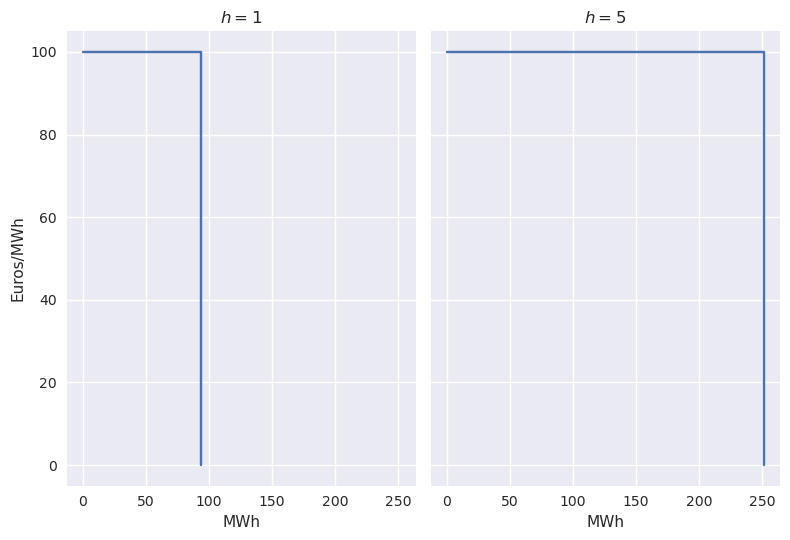

In [11]:
fig, ax = plt.subplots(ncols=2,sharex=True,sharey=True)
for i in range(len(h_grid)):
    h = h_grid[i]
    ax[i].step(df_Hd.xs(h,level='h')['H_cs'],df_Hd.xs(h,level='h')['mwp'])
    ax[i].set_title(r'$h=$'+str(h))
    
[ax[i].set_xlabel('MWh') for i in [0,1]];
ax[0].set_ylabel('Euros/MWh')
fig.tight_layout()

## E2.1

__Compute and illustrate the hourly supply curve (i.e. the merit order curve) for heat for hours $h=\{1,5\}$. Include also the demand curve and the optimal value ${\lambda^H_h}^*$ Finally, discuss how the reservation price of heat can be negative in $h=1$.__

*Note: To compute the supply curve, you have to realize the the reservation price for back-pressure plants and heat pumps is not equal to their marginal costs $(mc_i)$ because their reservation price depend on the electricity market. Therefore, you may draw the supply curve given the optimal value ${\lambda_{h}^{E}}^{*}$.*

*Furthermore, the graph should look something like this:*

In [12]:
Image(os.path.join(figs_path,'E2.1_sol.png'))

FileNotFoundError: No such file or directory: '/Users/l/Desktop/Programming/EnergyEconomicsE2023/Exercises/E41/E41/Figs/E2.1_sol.png'

FileNotFoundError: No such file or directory: '/Users/l/Desktop/Programming/EnergyEconomicsE2023/Exercises/E41/E41/Figs/E2.1_sol.png'

<IPython.core.display.Image object>

---
___Answer:___

First, the capacities for generating heat is:

In [13]:
HCap = pd.concat([
    m.hourlyGeneratingCap_H.loc[H_id,:],
    m.hourlyGeneratingCap_E.loc[BP_id,:].div(db['E2H'].loc[BP_id]),
],axis=0)

Next, by isolating $\lambda_h^H$ in eq (2b) we see that back-pressure plants reservation price in the optimum is equal to:
\begin{align}
    \forall i\in\mathcal{I}^{BP}: \quad {r^{H}_{i,h}}^{*} = \nu_i \left(c_i-{\lambda_h^E}^{*}\right),
\end{align}
which can be computed as:

In [14]:
rH_BP = pd.Series(0,index = HCap.loc[BP_id,:].index).add(m.db['mc'].loc[BP_id]).sub(m.db['marginalSystemCosts_E']).mul(db['E2H'].loc[BP_id]).droplevel('g').reorder_levels(HCap.index.names)

Simiarly, isolating for $\lambda_h^H$ in (2d), the reservation price of heat pumps in optimum is

\begin{align}
    \forall i\in\mathcal{I}^{HP}: \quad {r^H_{i,h}}^{*} = c_i - \nu_i{\lambda_h^E}^{*},
\end{align}

which can be computed as:

In [15]:
rH_HP = pd.Series(0,index=HCap.loc[HP_id,:].index).sub(m.db['marginalSystemCosts_E']).mul(db['E2H'].loc[HP_id]).add(m.db['mc'].loc[HP_id]).droplevel('g').reorder_levels(HCap.index.names)

Finally, the reservation price of standard heat producing plants are simply equal to their marginal costs, i.e.

In [16]:
rH_Std = pd.Series(0,index=HCap.loc[StdH_id,:].index).add(m.db['mc'].loc[StdH_id]).reorder_levels(HCap.index.names)

Now we can collect all reservation prices in a common dataframe:

In [17]:
rH = pd.concat([rH_BP,rH_HP,rH_Std],axis=0)

Finally, we can build the supply frame:

In [18]:
df_Hs = pd.concat([HCap.rename('H').astype(float),rH.rename('r').astype(float)],axis=1)
mi_Hs_lo = pd.MultiIndex.from_product([['0'],db['h']],names=df_Hs.index.names)
df_Hs_lo = pd.concat([
    pd.Series(0,index=mi_Hs_lo).rename('H'),
    pd.Series(df_Hs.groupby('h')['r'].min().sub(ϵ).values,index=mi_Hs_lo,name='r')
],axis=1)
mi_Hs_up = pd.MultiIndex.from_product([['-1'],db['h']],names=df_Hs.index.names)
df_Hs_up = pd.concat([
    pd.Series(ϵ,index=mi_Hs_up).rename('H'),
    pd.Series(m.db['MWP_H']*1.1,index=mi_Hs_up,name='r')
],axis=1)
df_Hs = pd.concat([df_Hs,df_Hs_up,df_Hs_lo],axis=0).sort_values(['h','r'])
df_Hs['H_cs'] = df_Hs.groupby('h')['H'].transform('cumsum')

And then plot the equilibrium for the two hours:

FileNotFoundError: [Errno 2] No such file or directory: '/Users/l/Desktop/Programming/EnergyEconomicsE2023/Exercises/E41/E41/Figs\\E2.1_sol.png'

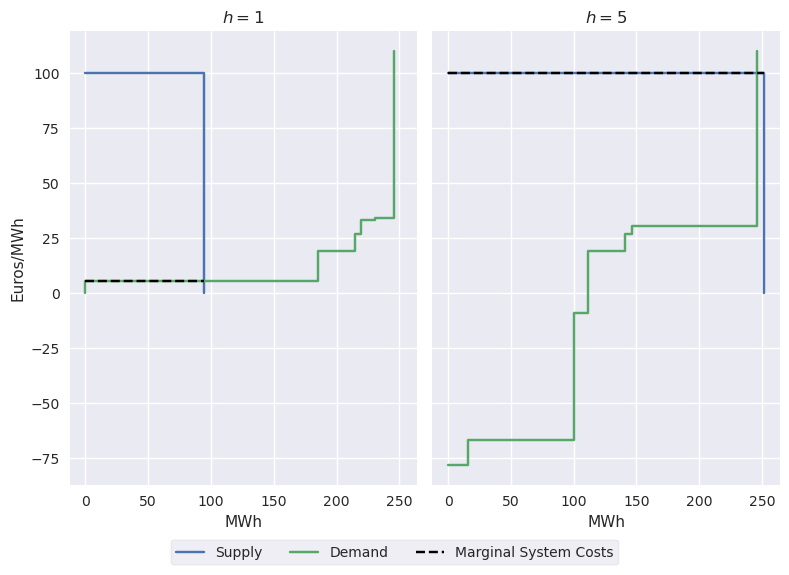

In [19]:
fig, ax = plt.subplots(ncols=2,sharex=True,sharey=True)
for i in range(len(h_grid)):
    h = h_grid[i]
    # Demand curve:
    ax[i].step(df_Hd.xs(h,level='h')['H_cs'],df_Hd.xs(h,level='h')['mwp'])
    # Supply curve:
    ax[i].step(df_Hs.xs(h,level='h')['H_cs'],df_Hs.xs(h,level='h')['r'])
    # Horizontal line indicating the equilibrium price
    ax[i].hlines(xmin=0,xmax=df_Hd.xs(h,level='h')['H'].sum(),y=m.db['marginalSystemCosts_H'].xs(h,level='h').iloc[0],color='black',linestyle='--')
    ax[i].set_title(r'$h=$'+str(h))
    
[ax[i].set_xlabel('MWh') for i in [0,1]];
ax[0].set_ylabel('Euros/MWh')
fig.legend(['Supply','Demand','Marginal System Costs'],loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=3, frameon=True)
fig.tight_layout()
fig.savefig(f"{figs_path}\\E2.1_sol.png", edgecolor='k',bbox_inches='tight')

Finally, we see that technologies with negative reservation prices are all of the back-pressure type:

In [20]:
df_tmp = df_Hs.xs(5,level='h').loc[df_Hs.xs(5,level='h')['r']<0,'r']
df_tmp[df_tmp.index.isin(H_id.append(BP_id))]

id
g1_BP_NatGas    -77.973312
g1_BP_Coal      -66.833926
g1_BP_BioMass    -9.176206
Name: r, dtype: float64

This is despite them having marginal generation costs of

In [21]:
m.db['mc'].loc[BP_id]

id
g1_BP_BioMass    81.273048
g1_BP_Coal       20.435802
g1_BP_NatGas     40.020529
dtype: object

This is because the marginal system costs in hour $h=5$ is at ${\lambda_h^E}^{*}=\mu^E=100$, implying the back-pressure plants can use the revenue from electricity generating to essentially subsidize their reservation for heat generation. 

## E2.2

__Illustrate the demand curve for electricity for $h=\{1,5\}$ and comment on why the maximum willingness to pay in $h=5$ is so high.__ 

_Note: For this, you have to illustrate the aggregate demand curve is composed of the sum of the set of conventional consumes $(c_E)$ as well that the sum of heat pumps' maximum capacity for electricity consumption: $-\sum_{i\in\mathcal{I}^E}\nu_iq_{i,h}$. Hence, you will have compute $\text{MWP}^{HP}_h$ using your answer in [E1.4](#E1.4) as well as heat pumps' maximum input capacity of electricity._

_Furthermore, the figure should look something like this:__

In [ ]:
Image(os.path.join(figs_path,'E2.2_sol.png'))

---
___Answer:___

First, the reason for the high willingness to pay in $h=5$ $(\mu^E_{HP}=339)$ in hour 5, is that the heating price at its maximum of ${\lambda_5^H}^*=\mu^H=100$. Given the parameter values of $c_{HP}$ and $\nu_{HP}$ it is possible that the heat pump's willingess to pay for electricity is higher than $\mu^E=100$.

Second, for illustrating the graph, we first note that the maximum electricity input capacity of $i\in\mathcal{I}^{HP}$ can be computed as:

In [ ]:
qE_HP = -m.hourlyGeneratingCap_H.loc[HP_id,:].mul(db['E2H'].loc[HP_id])

Using the answer in [E1.5](#E1.5), $\text{MWP}^{HP}_h$ can be computed as:

In [ ]:
MWP_HP = pd.Series(0,index=HCap.loc[HP_id,:].index).add(m.db['mc'].loc[HP_id]).add(-m.db['marginalSystemCosts_H'].droplevel('g')).div(db['E2H'].loc[HP_id])

We can collect demand from the heat pump together with the perfectly inelastic demand:

In [ ]:
mi_Ed = pd.MultiIndex.from_product([['c1'],db['h']],names=['c_type','h'])
df_Ed = pd.concat([
    pd.concat([
        pd.Series(m.hourlyLoad_E.values,index=mi_Ed,name='E'),
        pd.Series(db['MWP_E'],index=mi_Ed,name='mwp')
    ],axis=1),
    pd.concat([
        qE_HP.rename('E'),
        MWP_HP.rename('mwp')
    ],axis=1).rename_axis(index={'id':'c_type'})
],axis=0).astype(float)

For plotting, we just need to add the upper and lower points:

In [ ]:
mi_Ed_up = pd.MultiIndex.from_product([['0'],db['h'].tolist()],names=['c_type','h'])
df_Ed_up = pd.concat([
    pd.Series(-ϵ,index=mi_Ed_up,name='E'),
    pd.Series(df_Ed.groupby('h')['mwp'].max().values+ϵ,index=mi_Ed_up,name='mwp')
],axis=1)
mi_Ed_lo = pd.MultiIndex.from_product([['-1'],db['h'].tolist()],names=['c_type','h'])
df_Ed_lo = pd.concat([
    pd.Series(ϵ,index=mi_Ed_lo,name='E'),
    pd.Series(loλ,index=mi_Ed_lo,name='mwp')
],axis=1)
df_Ed = pd.concat([df_Ed,df_Ed_up,df_Ed_lo],axis=0).sort_values(['h','mwp'],ascending=[True,False]).astype(float)
df_Ed['E_cs'] =df_Ed.groupby('h')['E'].transform('cumsum')

And now we can plot it:

In [ ]:
fig, ax = plt.subplots(ncols=2,sharex=True,sharey=True)
for i in range(len(h_grid)):
    h = h_grid[i]
    ax[i].step(df_Ed.xs(h,level='h')['E_cs'],df_Ed.xs(h,level='h')['mwp'])
    ax[i].set_title(r'$h=$'+str(h))
    
[ax[i].set_xlabel('MWh') for i in [0,1]];
ax[0].set_xlim(left=0)
ax[0].set_ylabel('Euros/MWh')
fig.tight_layout()
fig.savefig(f"{figs_path}\\E2.2_sol.png", edgecolor='k',bbox_inches='tight')

## E2.3

__Compute and illustrate the hourly supply curve (i.e. the merit order curve) for electricity for hours $h=\{1,5\}$. Include also the demand curve and the optimal value ${\lambda^E_h}^*$.__

*Hint: The figure should look something like this:*

In [ ]:
Image(os.path.join(figs_path,'E2.3_sol.png'))

---
___Answer:___

First, the electricity generating capacities are

In [ ]:
ECap = m.hourlyGeneratingCap_E.loc[E_id,:]

Using the answer in [E1.4](#E1.4), we can compute back-pressure plants' reservation price for electricity as:

In [ ]:
rE_BP = pd.Series(0,index=ECap.loc[BP_id,:].index).sub(m.db['marginalSystemCosts_H'].droplevel('g')).div(db['E2H'].loc[BP_id]).add(m.db['mc'].loc[BP_id])

The reservation price for standard electricity producing plants are

In [ ]:
rE_Std = pd.Series(0,index=ECap.loc[StdE_id,:].index).add(m.db['mc'].loc[StdE_id])

Finally, we can build the supply frame:

In [ ]:
df_Es = pd.concat([
    ECap.rename('E').astype(float),
    pd.concat([rE_BP,rE_Std],axis=0).rename('r').astype(float)
],axis=1)
mi_Es_lo = pd.MultiIndex.from_product([['0'],db['h']],names=df_Hs.index.names)
df_Es_lo = pd.concat([
    pd.Series(0,index=mi_Es_lo).rename('E'),
    pd.Series(df_Es.groupby('h')['r'].min().sub(ϵ).values,index=mi_Es_lo,name='r')
],axis=1)
mi_Es_up = pd.MultiIndex.from_product([['-1'],db['h']],names=df_Es.index.names)
df_Es_up = pd.concat([
    pd.Series(ϵ,index=mi_Es_up).rename('E'),
    pd.Series(m.db['MWP_E']*1.1,index=mi_Hs_up,name='r')
],axis=1)
df_Es = pd.concat([df_Es,df_Es_up,df_Es_lo],axis=0).sort_values(['h','r'])
df_Es['E_cs'] = df_Es.groupby('h')['E'].transform('cumsum')

And then plot the equilibrium for the two hours:

In [ ]:
fig, ax = plt.subplots(ncols=2,sharex=True,sharey=False)
for i in range(len(h_grid)):
    h = h_grid[i]
    # Demand curve:
    ax[i].step(df_Ed.xs(h,level='h')['E_cs'],df_Ed.xs(h,level='h')['mwp'])
    # Supply curve:
    ax[i].step(df_Es.xs(h,level='h')['E_cs'],df_Es.xs(h,level='h')['r'])
    # Horizontal line indicating the equilibrium price
    ax[i].hlines(xmin=0,xmax=df_Ed.xs(h,level='h')['E'].sum(),y=m.db['marginalSystemCosts_E'].xs(h,level='h').iloc[0],color='black',linestyle='--')
    ax[i].set_title(r'$h=$'+str(h))
    
[ax[i].set_xlabel('MWh') for i in [0,1]];
ax[0].set_ylabel('Euros/MWh')
fig.legend(['Supply','Demand','Marginal System Costs'],loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=3, frameon=True)
fig.tight_layout()
fig.savefig(f"{figs_path}\\E2.3_sol.png", edgecolor='k',bbox_inches='tight')

## E2.4

In this exercise you are asked to simulate the effects of increasing the heat pump capacity. We will do so by solving the model over of an exogenous grid of the heat pump capacity. For making the grid, the `pyDbs` package has a class called `adjMultiIndex`, which has a function called _addGrid_. It takes the four centrale arguments:

```python
adjMultiIndex.addGrid(v0,vT,index,name)
```
where 
- v0 is a Pandas Index specifying the first element of the grid. 
- vT is a Pandas Index specifying the last element of the grid.
- index is a Pandas Index specifying the number points in the gridd.
- name is the name of the variable, we are changing. 

The following makes the grid:

In [ ]:
loop = pd.Index(range(11), name = 'l1')
v0 = pd.Series(0.01, index = pd.Index(['g1_HP'], name = 'id'), name = 'GeneratingCap_H')
vT = v0+100
grid = adjMultiIndex.addGrid(v0,vT,index=loop,name='GeneratingCap_H')

__Now use the 'loopSolveExtract'-function in the `modelShell`-class to solve the model of the exogenous grid. Furthermore, extract the following list of variables:__
```python
extract = [
    'meanConsumerPrice_E','meanConsumerPrice_H', # average yearly consumer prices
    'marginalEconomicValue' # marginal economic value of capacity
]
```

---
___Answer:___

In [ ]:
extract = [
    'meanConsumerPrice_E','meanConsumerPrice_H',
    'marginalEconomicValue'
]
solution = m.loopSolveExtract(loop, [grid], extract)

## E2.5

Consider the following figure illustrating the _marginal economic value of generating capacity_ as a function of installed heat pump capacity split into electricity generators $(i\in\mathcal{I}^{E})$, heat generators $(i\in\mathcal{I}^{H})$, and back-pressure plants $(i\in\mathcal{I}^{BP})$:

In [ ]:
Image(os.path.join(figs_path,'E2.5_sol.png'))

__Define the marginal economic value of capacity and explain the effect of the heat pump capacity on the marginal economic value of generating capacity for (i) electricity producing plants, (ii) heat generating plants, and (iii) back-pressure plants.__

___Asnwer:___

The marginal economic value of capacity (MEVoC) is defined by differentiating the Lagrangian function defined in [E1.2](#E1.2) with respect to the relevant capacity variable. For standard electricity producing plants, we have that
\begin{align*}
    \forall i\in\mathcal{I}^E: && \dfrac{\partial \mathcal{L}}{\partial q_i} &= -\text{FOM}_i +\sum_h \overline{\theta}_{i,h}^E \frac{\partial q_{i,h}}{\partial q_i} \\
    && &=-\text{FOM}_i + \sum_h \overline{\theta}_{i,h}^E\gamma_{i,h},
\end{align*}
where $\overline{\theta}_{i,h}^E$ is the shadow price on the constraint $E_{i,h}\leq q_{i,h}$. $\overline{\theta}_{i,h}^E>0$ only if the constraint is binding, which -- according to eq. (2a) -- is the case when $\lambda_h^E-c_i>0$. Hence,
\begin{align*}
    \forall i\in\mathcal{I}^E: && \dfrac{\partial \mathcal{L}}{\partial q_i} &= -\text{FOM}_i + \sum_h \max\left\{ \lambda_h^E - c_i, 0 \right\}\gamma_{i,h},
\end{align*}
It is quite easy to show that this expression is equal to the maximized profits a standard electricity plant. 

Similarly, it is possible to show that
\begin{align*}
    \forall i\in\mathcal{I}^{BP}: && \dfrac{\partial \mathcal{L}}{\partial q_i} &= -\text{FOM}_i + \sum_h \max\left\{ \lambda_h^E +\frac{\lambda_h^E}{\nu_i}- c_i, 0 \right\}\gamma_{i,h} \\
    \forall i\in\mathcal{I}^{H}: && \dfrac{\partial \mathcal{L}}{\partial q_i} &= -\text{FOM}_i + \sum_h \max\left\{ \lambda_h^H- c_i, 0 \right\}\gamma_{i,h} \\
    \forall i\in\mathcal{I}^{HP}: && \dfrac{\partial \mathcal{L}}{\partial q_i} &= -\text{FOM}_i + \sum_h \max\left\{ \lambda_h^H +\nu_i\lambda_h^E- c_i, 0 \right\}\gamma_{i,h}, \\
\end{align*}

Hence, chances in MEVoC occurs via marginal system costs $(\lambda_h^E,\lambda_h^H)$. 

Generally speaking, we can interpret the increasing heat pump capacity as a positive electricity demand shock and a positive heat supply shock. Hence, we expect electricity prices to go up and heat prices to decrease. Using the expressions above, this should translate into
- a larger MEVoC for $i\in\mathcal{I}^E$, which is also evident in the figure.
- a smaller MEVoC for $i\in\mathcal{I}^H$, which is also evident in the figure.
- an ambigous effect MEVoC for $i\in\mathcal{I}^{BP}$:
    - Firstly, if heat prices are more quickly decreasing than increases in electricity prices, then MEVoC will decrease all else equal. 
    - Secondly, if $\nu_i$ is relatively large -- so that unit revenues from heat generation matters relatively more -- then it is more likely that MEVoC decreases. This is also evident in the figure since the biomass-fired back-pressure plant has the highest value of $\nu_i$ and has the lowest MEVoC.

For the back-pressure plants, we also see from the figure that heat prices must generally be decreasing faster than electricity prices are increasing, since the MEVoC of back-pressure plants are decreasing in the heat pump capacity. We can confirm that this is the case by looking af the average yearly prices as a function of the heat pump capacity:

In [ ]:
fig,ax = plt.subplots(ncols=2,sharex=True, sharey=True)
ax[0].plot(grid.values,solution['meanConsumerPrice_E'])
ax[0].set_title(r'Electricity market')
ax[1].plot(grid.values,solution['meanConsumerPrice_H'])
ax[1].set_title(r'Heat market')
[ax[i].set_xlabel('Heat pump capacity') for i in range(2)];
ax[0].set_ylabel('Euros/MWh')
fig.tight_layout()

When electricity prices does not increase rapidly it is because electricity supply is relatively elastic at the optimal value of $\lambda^E$: For a larger demand, supply quickly adjusts for even relatively small price increases. 

Furthermore, heat prices decreases rapidly 
- first and foremost because demand is perfectly elastic and does not adjust in response to lower heat prices (from the positive supply shock),
- but also because the price decreases are exacerbated by heat supply being relatively inelastic at the optimal value of $\lambda^H$. Even small supply shocks causes prices to decrease relatively much.  

*Note that the code for generating the MEVoC is:*

In [ ]:
%%capture
# Collect values:
mev = solution['marginalEconomicValue'].unstack('id')
mev.index =  pd.Index(grid.values, name = 'Heat pump capacity')
mev0 = mev.iloc[0]

# Split the value into three components:
mev_H = mev.loc[:,mev.columns.isin(id2modelTech.reset_index()[id2modelTech.reset_index()['modelTech'].isin(['standard_H','HP'])].id)]
mev_E = mev.loc[:,mev.columns.isin(id2modelTech.reset_index()[id2modelTech.reset_index()['modelTech'].isin(['standard_E'])].id)]
mev_BP = mev.loc[:,mev.columns.isin(id2modelTech.reset_index()[id2modelTech.reset_index()['modelTech'].isin(['BP'])].id)]
mevs = [mev_E,mev_H,mev_BP]

# Index values
for j in range(len(mevs)):
    p = mevs[j]
    p.columns=p.columns.str.strip('g1_')
    mevs[j] = p.reindex(p.iloc[0].sort_values(ascending=False).index, axis = 1).div(p.iloc[0],axis=1)*100 # sort columns by the value at index 0

# Now plot
# mult_graphs()
fig,ax = plt.subplots(nrows=3,sharex=True, sharey=True)
[mevs[i].plot(ax=ax[i], ylabel='Index=100') for i in range(0,3)];
[ax[i].legend(loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1, frameon=True) for i in range(0,3)];
ax[0].set_title(r'Electricity generators, $i\in\mathcal{I}^{E}$')
ax[1].set_title(r'Heat generators, $i\in\mathcal{I}^{H}$')
ax[2].set_title(r'Back-pressure plants, $i\in\mathcal{I}^{BP}$')
fig.tight_layout()
fig.savefig(f"{figs_path}\\E2.5_sol.png", edgecolor='k',bbox_inches='tight')